## Definición formal de una neurona artificial

En contexto de una clasificación binaria. Podemos definir una función de decisión, $\sigma(z)$ que toma una combinación linear de ciertos valores de entrada, $x$, y el correspondiente vector de pesos, $w$, donde $z$ es la llamada entrada neta $z = w_1x_1 + w_2x_2 + \cdots + w_mx_m$, con:

$$
w = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_m \end{bmatrix} \quad \text{y} \quad x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{bmatrix}
$$

Ahora, si la entrada neta de una observación en particular, $x^{(i)}$, es mayor a un límite $\theta$, predecimos clase 1 y clase 0 de otra forma. Esto es, la función de decisión es la siguiente:

$$
\sigma(z) = \begin{cases} 1 & \text{ si } z \geq \theta \\ 0 & \text{ si } z < \theta \end{cases}
$$

Para facilitar la implementación en código hacemos algunas modificaciones:

$$
z \geq \theta \\
z - \theta \geq 0
$$

Luego definimos una unidad de **sesgo** como $b = -\theta$ y la hacemos parte de la entrada neta:

$$
z = w_1x_1 + w_2x_2 + \cdots + w_mx_m + b = w^Tx + b
$$

Y por último definimos la función de decisión así:

$$
\sigma(z) = \begin{cases} 1 & \text{ si } z \geq 0 \\ 0 & \text{ si } z < 0 \end{cases}
$$

## La regla de aprendizaje del perceptrón

Se puede resumir en estos pasos:

1. Inicializar los pesos y el sesgo a 0 o pequeños números aleatorios.
2. Para cada observación de entrenamiento $x^{(i)}$:
    1.  Computa el valor de salida, $\hat{y}^{(i)}$
    2.  Actualizar los pesos y el sesgo.

El valor de la salida en este caso es la clase predicha por la función de decisión, la actualización de los pesos y el sesgo se puede describir así:

$$
w_j := w_j + \Delta w_j \\
\text{y} \quad b := b + \Delta b
$$

Los deltas se computan así:

$$
\Delta w_j =  \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)} \\
\text{y} \quad \Delta b =  \eta(y^{(i)} - \hat{y}^{(i)})
$$

Cada peso corresponde a una característica. $\eta$ es la tasa de aprendizaje (un valor entre 0 y 1). $y^{(i)}$ es la clase verdadera de la observación $x^{(i)}$ y $\hat{y}^{(i)}$ es la clase predicha por la función de decisión.

La convergencia del perceptrón se garantiza solo si las dos clases son **linealmente separables**.

Si las clases no son linearmente separables, podemos establecer un **máximo de épocas (epochs)** y un límite para la tolerancia de mal clasificados.
 

## Implementación del perceptrón en Python

In [7]:
import numpy as np

class Perceptron:
    """ Clasificador Perceptron
    
    Parámetros:
    -----------
    eta: float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter: int
        Número de pasadas sobre el conjunto de entrenamiento.
    random_state: int
        Semilla para generar los pesos aleatorios.
    
    Atributos:
    ----------
    W_: arreglo 1d
        Pesos después del ajuste.
    b_: escalar
        Sesgo después del ajuste.
    
    errors_: lista
        Número de mal clasificados (actualizaciones) en cada época.
        
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Ajustar los datos de entrenamiento.
        
        Parámetros:
        -----------
        X: {arreglo}, forma = [n_observaciones, n_características]
            Vectores de entrenamiento, donde n_observaciones es el numero de observaciones
            y n_características es el número de características.
        y: {arreglo}, forma = [n_observaciones]
            valores target.
        
        Devuelve:
        ---------
        self: objeto
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                              size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                actualiza = self.eta * (target - self.predict(xi))
                self.w_ += actualiza * xi
                self.b_ += actualiza
                errors += int(actualiza != 0.0)
            self.errors_.append(errors)
        return self
    
    def entrada_neta(self, X):
        """ Calcular la entrada neta """
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """ Devuelve la clase predicha """
        return np.where(self.entrada_neta(X) >= 0.0, 1, 0)

## Entrenamiento del perceptrón con los datos IRIS

In [8]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'
print('De URL:', s)
df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.tail()

De URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


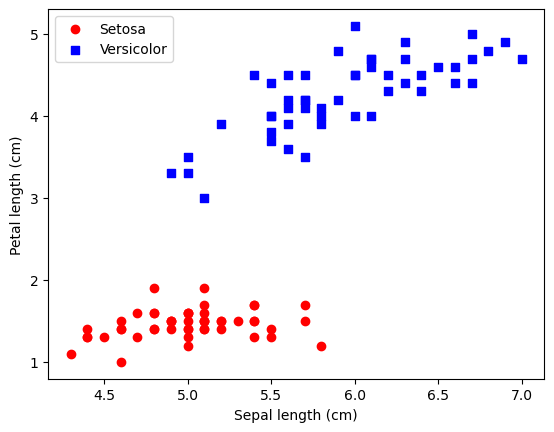

In [9]:
# extraemos las primeras 100 observaciones que corresponden 50 SETOSA y 50 VERSICOLOR
# convertimos 1 versicolor y 0 setosa
# extraemos la primera columna (sepal length) y la tercera columna (petal length)

import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0, 2]].values

# graficamos los datos

plt.scatter(X[:50, 0], X[:50, 1],
            color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color = 'blue', marker = 's', label = 'Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc = 'best')
plt.show()

Vemos que una linea recta podría separar las dos clases. Ahora entrenamos el perceptrón.

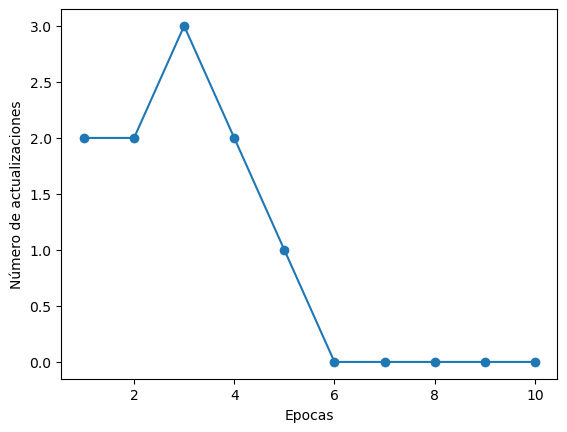

In [10]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker = 'o')
plt.xlabel('Epocas')
plt.ylabel('Número de actualizaciones')
plt.show()

El número de actualizaciones y errores de clasificación son iguales, ya que los pesos y el sesgo se actualizan cada vez que clasifica mal una observación. Vemos que el perceptrón convergió luego de la sexta época y debería clasificar los datos de entrenamiento perfectamente. Ahora graficamos la región de decisión.

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # establecer marcas y mapeo de colores
    marcas = ('o', 's', '^', 'v', '<')
    colores = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colores[:len(np.unique(y))])
    
    # graficar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # graficar las muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c = colores[idx],
                    marker = marcas[idx],
                    label = f'Clase {cl}',
                    edgecolor = 'black')

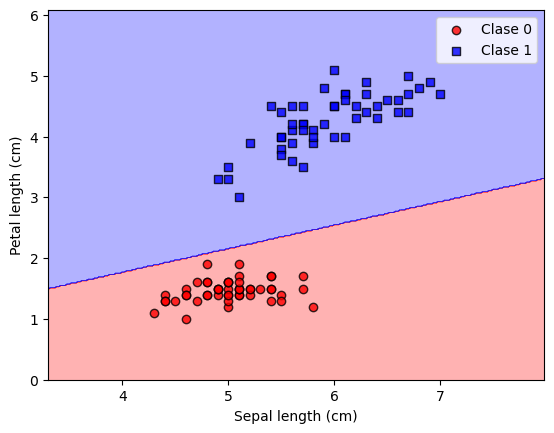

In [12]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend(loc = 'best')
plt.show()

## Adaptive linear neurons y la convergencia del aprendizaje

Este es otro tipo de red neuronal de una sola neurona, **Adaptive LInear NEuron (Adaline)**. La diferencia con el perceptrón es que los pesos se actualizan basados en una función de activación lineal en vez de una función de paso como en el perceptrón.

En Adaline esta función de activación es la función identidad $\sigma(z) = z$.

Igualmente se usa una función de paso para la clasificación.

## Minimizar funciones de costo con el algoritmo de descenso de gradiente

Aquí usamos el término **función objetivo**, esta es la función que se quiere optimizar en el proceso. Casi siempre es una **función de perdida** que queremos minimizar. En el caso de Adaline esta función es el **cuadrado del error medio (MSE):**

$$
L(w, b) = \frac{1}{2n} \sum_{i=1}^{n} \left(y^{(i)} - \sigma(z^{(i)})\right)^2
$$

El término $1/2$ es añadido por conveniencia, ya que hace más fácil derivar el gradiente de la función de pérdida con respecto a los parámetros. La conveniencia con esta función de activación contraria a la función de paso es que la función de pérdida se vuelve diferenciable. Otra propiedad importante es que es convexa, lo que significa que solo tiene un mínimo global, por lo cual podemos usar **descenso de gradiente** para encontrar los pesos que minimizan la función de pérdida.

Usando el descenso de gradiente podemos actualizarlos parámetros del modelo tomando un paso en la dirección opuesta del gradiente $\nabla L(w, b)$ de la función de pérdida $L(w, b)$:

$$
w:= w + \Delta w, \quad b:= b + \Delta b
$$

Los cambios del parámetro $\Delta w$ y $\Delta b$ son definidos como el negativo del gradiente multiplicado por la tasa de aprendizaje $\eta$:

$$
\Delta w = -\eta \nabla_w L(w, b), \quad \Delta b = -\eta \nabla_b L(w, b) 
$$

Para computar el gradiente de la función de perdida, calculamos las derivadas parciales de la función de perdida con respecto a cada peso $w_j$:

$$
\frac{\partial L}{\partial w_j} = -\frac{2}{n} \sum_{i=1}^{n} \left(y^{(i)} - \sigma(z^{(i)})\right)x_j^{(i)}
$$

Similar, calculamos la derivada parcial con respecto al sesgo:

$$
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \left(y^{(i)} - \sigma(z^{(i)})\right)
$$

Podemos escribir las actualizaciones de peso asi:

$$
\Delta w_j = -\eta \frac{\partial L}{\partial w_j}, \text{ y } \Delta b = -\eta \frac{\partial L}{\partial b}
$$

## Implementación de Adaline en Python

In [21]:
class AdalineGD:
    """ Adaptive Linear Neuron Classifier
    
    Parámetros:
    -----------
    eta: float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter: int
        Pasadas sobre el conjunto de entrenamiento.
    random_state: int
        Semilla para generar los pesos aleatorios.
    
    Atributos:
    ----------
    w_: arreglo 1d
        Pesos después del ajuste.
    b_: escalar
        Sesgo después del ajuste.
    pérdida: lista
        Media del error cuadrático en cada época. (función de costo)
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Ajustar los datos de entrenamiento.
        Parámetros:
        -----------
        X: {arreglo}, forma = [n_observaciones, n_caracteristicas]
            Vectores de entrenamiento, donde n_observaciones es el numero de observaciones
            y n_caracteristicas es el número de características.
        y: {arreglo}, forma = [n_observaciones]
            Valores target
        
        Returns
        -------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                              size = X.shape[1])
        self.b_ = np.float_(0.)
        self.perdida_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.perdida_.append(loss)
        return self
    
    def net_input(self, X):
        """ Calcular la entrada neta """
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        """ Calcular la activación lineal """
        return X
    
    def predict(self, X):
        """ Devuelve la clase predicha """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Veamos la diferencia entre dos tasas de aprendizaje diferentes.

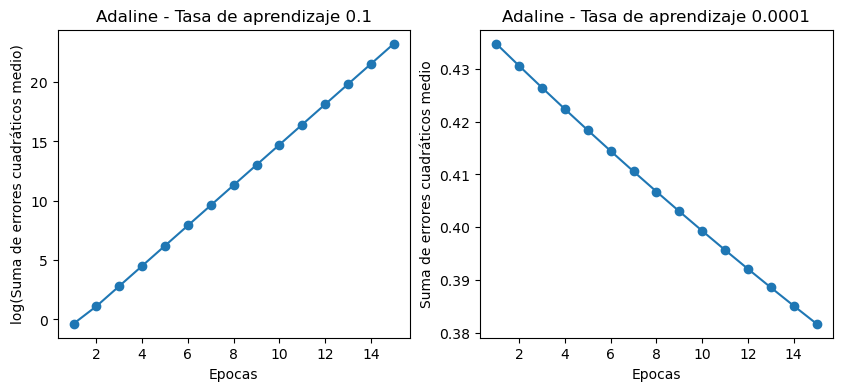

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ada1 = AdalineGD(n_iter = 15, eta = 0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.perdida_) + 1),
           np.log10(ada1.perdida_), marker = 'o')
ax[0].set_xlabel('Epocas')
ax[0].set_ylabel('log(Suma de errores cuadráticos medio)')
ax[0].set_title('Adaline - Tasa de aprendizaje 0.1')
ada2 = AdalineGD(n_iter = 15, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.perdida_) + 1),
           ada2.perdida_, marker = 'o')
ax[1].set_xlabel('Epocas')
ax[1].set_ylabel('Suma de errores cuadráticos medio')
ax[1].set_title('Adaline - Tasa de aprendizaje 0.0001')
plt.show()

Si escogemos una tasa de aprendizaje muy grande, es posible que el algoritmo diverja. Por otro lado, si la tasa de aprendizaje es muy pequeña, el algoritmo converge muy lentamente, lo que nos lleva a la necesidad de más épocas.

## Mejorando el descenso de gradiente con escalado de características

Muchos algoritmos son más eficientes si se escalan las características, en este caso el descenso de gradiente se beneficia de el escalado, ya que logra converger más rápido. El método más utilizado es la estandarización, que da a las características la propiedad de una distribución normal estándar, lo que ayuda al algoritmo a converger más rápido.

Esto se puede hacer fácilmente con la siguiente fórmula:

$$
x_j^' = \frac{x_j - \mu_j}{\sigma_j}
$$

In [28]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [29]:
ada_gd = AdalineGD(n_iter = 20, eta = 0.5)
ada_gd.fit(X_std, y)

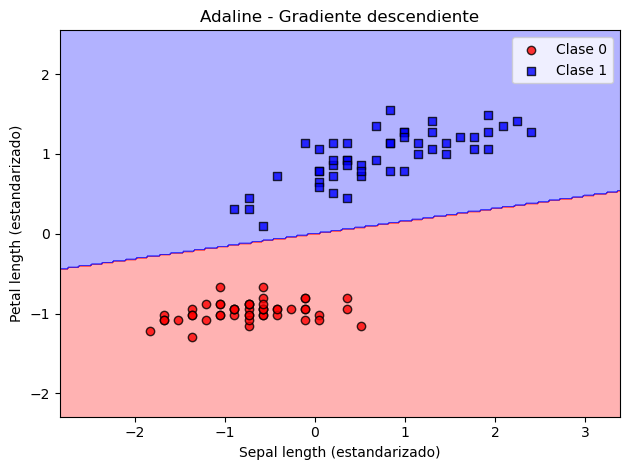

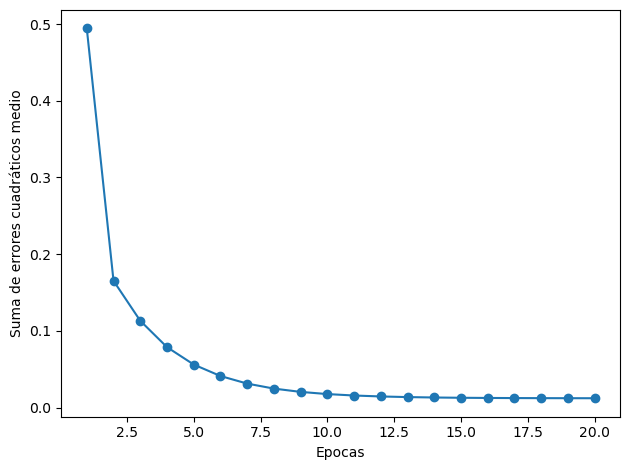

In [34]:
plot_decision_regions(X_std, y, classifier = ada_gd)
plt.title('Adaline - Gradiente descendiente')
plt.xlabel('Sepal length (estandarizado)')
plt.ylabel('Petal length (estandarizado)')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.perdida_) + 1),
         ada_gd.perdida_, marker = 'o')
plt.xlabel('Epocas')
plt.ylabel('Suma de errores cuadráticos medio')
plt.tight_layout() 
plt.show()

Converge mucho más rápido y con una tasa de aprendizaje grande.

## machine learning en gran escala y descenso de gradiente estocástico

El descenso de gradiente estocástico (SGD) es un enfoque alternativo para entrenar grandes conjuntos de datos. En vez de actualizar los pesos basados en la suma de los errores de todas las observaciones, SGD actualiza los pesos de cada observación. Debido a que SGD usa una observación a la vez, el algoritmo es mucho más rápido y puede ser usado para entrenar modelos en línea.

### Ajustando la tasa de aprendizaje durante el entrenamiento

Una forma de hacer que el algoritmo converja más rápido es ajustar la tasa de aprendizaje durante el entrenamiento. Una forma de hacerlo es usar una tasa de aprendizaje adaptativa, que decrece a medida que el número de épocas aumenta. Una forma simple de implementar esto es usar la siguiente fórmula:

$$
\eta = \frac{c_1}{\text{época} + c_2}
$$

Donde $c_1$ y $c_2$ son constantes positivas. La tasa de aprendizaje decrece con cada época, y el decrecimiento es más lento a medida que el número de épocas aumenta.

### Descenso de gradiente por mini lotes

El descenso de gradiente mini-batch es una variante del SGD que combina las ventajas del SGD y el descenso de gradiente por lotes. En el descenso de gradiente por lotes, el gradiente se computa sobre el conjunto de entrenamiento completo, lo que hace que el algoritmo sea muy lento. En SGD, el gradiente se computa sobre una sola observación, lo que hace que el algoritmo sea muy inestable. En el descenso de gradiente mini-batch, el gradiente se computa sobre un pequeño conjunto de observaciones, llamado mini-batch. Esto hace que el algoritmo sea mucho más estable y rápido que SGD.

## Implementación de Adaline con descenso de gradiente estocástico


In [35]:
class AdalineSGD:
    """ Adaptive Linear Neuron Classifier
    
    Parámetros:
    eta: float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter: int
        Pasadas sobre el conjunto de entrenamiento.
    shuffle: bool (default: True)
        Barajar los datos de entrenamiento cada época si es True para prevenir ciclos
    random_state: int
        Semilla para generar los pesos aleatorios.
    
    Atributos:
    ----------
    w_: arreglo 1d
        Pesos después del ajuste.
    b_: escalar
        Sesgo después del ajuste.
    errores_: lista
        Error cuadrado medio en cada época.
    """
    
    def __init__(self, eta = 0.01, n_iter = 10,
                 shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Ajustar los datos de entrenamiento.
        
        Parámetros:
        -----------
        X: {arreglo}, forma = [n_observaciones, n_características]
            Vectores de entrenamiento, donde n_observaciones es el numero de observaciones
            y n_características es el número de características.
        y: {arreglo}, forma = [n_observaciones]
            Valores target
        
        Returns 
        -------
        self: object
        
        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
                losses = []
                for xi, target in zip(X, y):
                    losses.append(self._update_weights(xi, target))
                avg_loss = np.mean(losses)
                self.losses_.append(avg_loss)
        return self
    
    def partial_fit(self, X, y):
        """ Ajustar los datos de entrenamiento sin reiniciar los pesos """
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
    
    def _shuffle(self, X, y):
        """ Barajar los datos """
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """ Inicializar los pesos a cero """
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01,
                                   size = m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ Aplicar la regla de aprendizaje para actualizar los pesos """
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * error
        self.b_ += self.eta * 2.0 * error
        loss = (error**2)
        return loss
    
    def net_input(self, X):
        """ Calcular la entrada neta """
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        """ Calcular la activación lineal """
        return X
    
    def predict(self, X):
        """ Devuelve la clase predicha """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

El método shuffle baraja los datos de entrenamiento para prevenir ciclos. La función partial_fit es para entrenar el modelo en línea, es decir, entrenar el modelo con una sola observación a la vez. Esto es útil para el aprendizaje en línea, donde el modelo se entrena con datos que llegan en tiempo real.

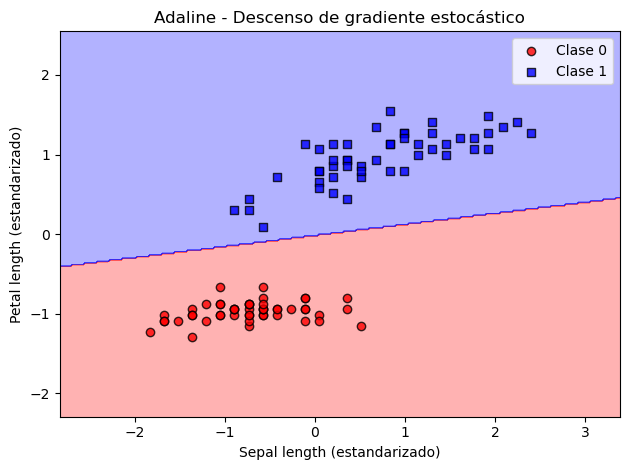

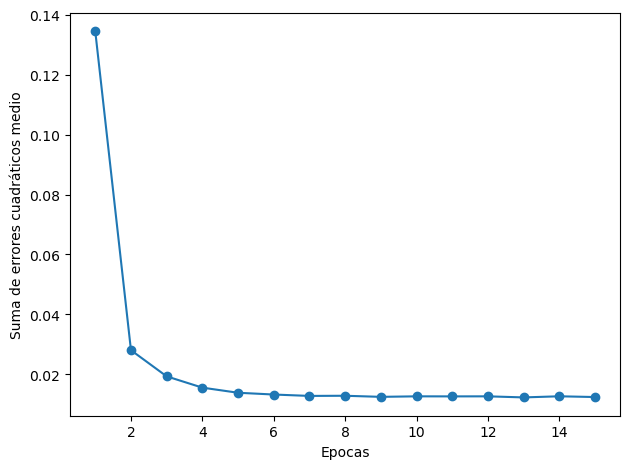

In [36]:
ada_sgd = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ada_sgd)
plt.title('Adaline - Descenso de gradiente estocástico')
plt.xlabel('Sepal length (estandarizado)')
plt.ylabel('Petal length (estandarizado)')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1),
         ada_sgd.losses_, marker = 'o')
plt.xlabel('Epocas')
plt.ylabel('Suma de errores cuadráticos medio')
plt.tight_layout()
plt.show()

La función de perdida disminuye rápidamente, lo que indica que el algoritmo converge rápidamente. Si queremos ver como se comporta el algoritmo en línea, podemos usar la función partial_fit.